In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.2MB/s 
     |████████████████████████████████| 1.2MB 10.5MB/s 
     |████████████████████████████████| 194kB 38.4MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
     |████████████████████████████████| 61kB 11.3MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#5) [Path('/content/gdrive/MyDrive/Colab Notebooks/Untitled0.ipynb'),Path('/content/gdrive/MyDrive/Colab Notebooks/images'),Path('/content/gdrive/MyDrive/Colab Notebooks/bears2'),Path('/content/gdrive/MyDrive/Colab Notebooks/players'),Path('/content/gdrive/MyDrive/Colab Notebooks/Untitled')]

In [4]:
path = export_path/'players'
path.ls()

(#3) [Path('/content/gdrive/MyDrive/Colab Notebooks/players/Mo Salah'),Path('/content/gdrive/MyDrive/Colab Notebooks/players/ronaldo'),Path('/content/gdrive/MyDrive/Colab Notebooks/players/bill gates')]


## Train bear classifier
To turn our downloaded data into a DataLoaders object we need to tell fastai at least four things:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

In [5]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #image->discrete category
    get_items=get_image_files, # path->images
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #how to train-valid split
    get_y=parent_label, # get the label from the directory name
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # random crop at each iteration, resize to 224x224
    batch_tfms=aug_transforms()) #a set of transformations like  rotation, flipping, perspective warping, brightness changes and contrast changes

In [6]:
# DataBlock is a template to create DataLoaders
dls = bears.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


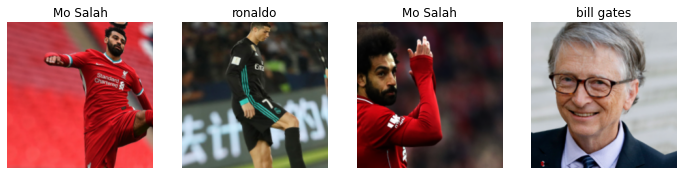

In [7]:
dls.train.show_batch(max_n=4, nrows=1)

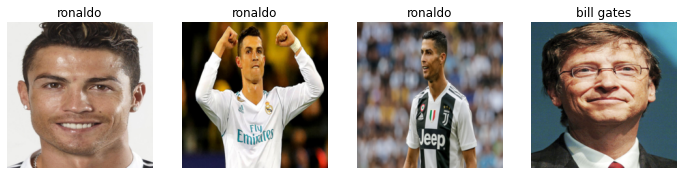

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

## Train the model

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.724965,0.593481,0.288889,01:01


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,0.589479,0.259548,0.100000,00:14
1,0.480708,0.138249,0.044444,00:14
2,0.370633,0.111039,0.033333,00:14
3,0.294583,0.114397,0.033333,00:14
4,0.245313,0.130476,0.033333,00:14
5,0.203758,0.126690,0.033333,00:14
6,0.171680,0.120382,0.033333,00:14
7,0.146724,0.108136,0.033333,00:14
8,0.127878,0.108262,0.033333,00:14
9,0.111951,0.106576,0.033333,00:14


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

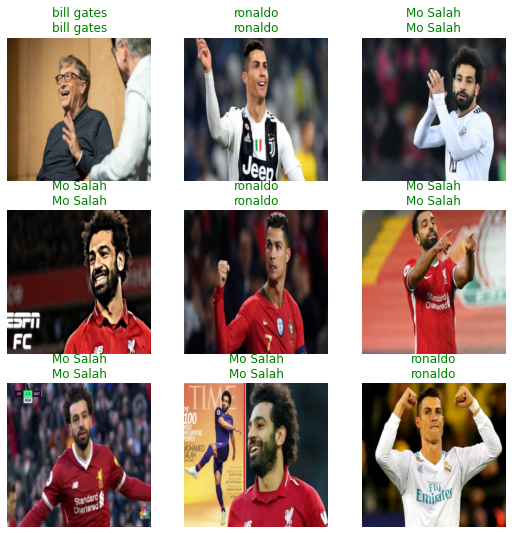

In [10]:
# actual
# predicted
learn.show_results()

## Analyze the model

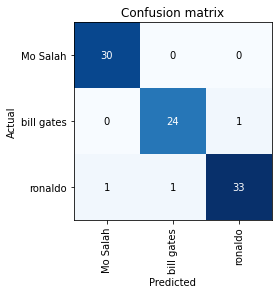

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

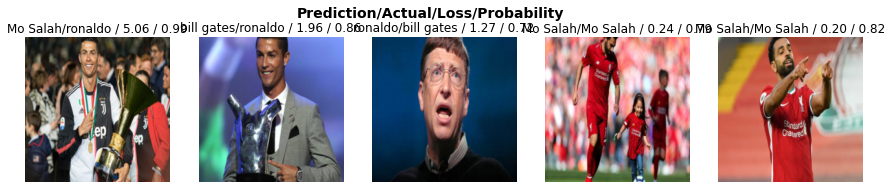

In [12]:
interp.plot_top_losses(5, nrows=1)